In [14]:
#investigate potentially protective effect of rural residency on elderly population in counties with high and low ICU occupancy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

In [15]:
nyte = pd.read_csv('../Generated_Files/nyt_enriched.csv')
irr2010 = pd.read_csv('../Data/IRR_2010.csv')

In [16]:
irr_tuples = []
for row in irr2010.iterrows():
    irr_tuples.append((row[1]["County Name"].split(" County")[0], #remove 'County'
                       row[1]["State"].lstrip(), #remove leading whitespace
                       row[1]['IRR2010']))
irr_df=pd.DataFrame(irr_tuples,columns=['county','state','irr2010'])

In [17]:
irr_nyte_merged = pd.merge(irr_df,nyte,left_on=['county','state'],right_on=['County','State']).drop(['county_x','county_y','state_x','state_y'],axis=1)
irr_nyte_merged

,irr2010,State,County,Total Population,num_icu_be,bed_utiliz,potential,pco60,popOver60,percentOver60,popOver60perICU,date,fips,cases,deaths,days_since_first_case,deaths_per_capita,cases_per_capita,deaths_per_case
0,0.48,Alabama,Autauga,55036,6.0,0.623113,30,0.031870,10523,19.1,1754.0,2020-05-21,1001.0,147,3,58,0.000055,0.002671,0.020408
1,0.44,Alabama,Baldwin,203360,44.0,1.657949,24,0.005158,53519,26.3,1049.0,2020-05-21,1003.0,270,8,68,0.000039,0.001328,0.029630
2,0.53,Alabama,Barbour,26201,5.0,0.430640,44,0.046945,6150,23.5,1230.0,2020-05-21,1005.0,100,1,48,0.000038,0.003817,0.010000
3,0.49,Alabama,Blount,57667,6.0,0.499069,0,0.039312,13600,23.6,2267.0,2020-05-21,1009.0,48,1,57,0.000017,0.000832,0.020833
4,0.54,Alabama,Butler,20126,7.0,0.183251,28,0.036570,5151,25.6,736.0,2020-05-21,1013.0,321,11,57,0.000547,0.015950,0.034268
5,0.42,Alabama,Calhoun,115527,24.0,0.809041,73,0.009781,27115,23.5,1130.0,2020-05-21,1015.0,136,3,64,0.000026,0.001177,0.022059
6,0.50,Alabama,Chilton,43805,6.0,0.285458,4,0.035886,9429,21.5,1572.0,2020-05-21,1021.0,84,1,57,0.000023,0.001918,0.011905
7,0.55,Alabama,Clay,13407,4.0,0.291126,7,0.064891,3480,26.0,870.0,2020-05-21,1027.0,27,2,57,0.000149,0.002014,0.074074
8,0.49,Alabama,Coffee,51073,7.0,0.238052,32,0.030838,11027,21.6,1575.0,2020-05-21,1031.0,184,1,49,0.000020,0.003603,0.005435
9,0.47,Alabama,Colbert,54435,22.0,0.517603,63,0.011739,14062,25.8,639.0,2020-05-21,1033.0,112,2,57,0.000037,0.002057,0.017857


#### KMeans Clustering
Cluster without per capita stats, but include them after cluster assignments have been made

In [24]:
sample = irr_nyte_merged[['County','State','num_icu_be','irr2010','popOver60','deaths','Total Population']][irr_nyte_merged.num_icu_be<1000]

In [25]:
X = sample[['num_icu_be','irr2010','popOver60','deaths','Total Population']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
sample.loc[:,'cluster'] = kmeans.labels_

Cluster centers can be viewed as prototypical couties in each cluster

In [26]:
pd.DataFrame(kmeans.cluster_centers_,
             columns=['num_icu_be','irr2010','popOver60','deaths','Total Population'])

,num_icu_be,irr2010,popOver60,deaths,Total Population
0,20.626392,0.469863,20640.146530,12.050557,9.232914e+04
1,426.100000,0.255500,408075.150000,537.650000,2.159981e+06
2,155.144928,0.275870,139721.608696,260.905797,7.011658e+05


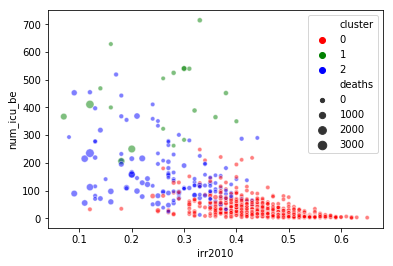

In [27]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='deaths',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

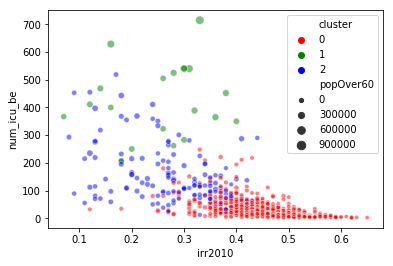

In [28]:
sns.scatterplot(x='irr2010',
                y='num_icu_be',
                size='popOver60',
                hue='cluster',
                palette=['red','green','blue'],
                alpha=0.5,
                data=sample)

In [29]:
sample[(sample.irr2010<0.3) & (sample.cluster==0)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
224,Clarke,Georgia,92.0,0.28,17345,13,123554,0
225,Clayton,Georgia,34.0,0.18,36959,42,274150,0
241,Forsyth,Georgia,24.0,0.25,33215,12,211300,0
435,Wyandotte,Kansas,129.0,0.29,27635,71,163227,0
510,Howard,Maryland,16.0,0.28,57302,49,312495,0
519,Barnstable,Massachusetts,21.0,0.27,80676,99,213900,0
712,Gloucester,New Jersey,14.0,0.28,60833,129,291372,0
715,Mercer,New Jersey,80.0,0.24,75299,438,373362,0
722,Somerset,New Jersey,28.0,0.25,67698,387,333316,0
800,Durham,North Carolina,70.0,0.29,51648,43,300865,0


In [31]:
sample[(sample.irr2010>0.3) & (sample.cluster==1)]

,County,State,num_icu_be,irr2010,popOver60,deaths,Total Population,cluster
49,Maricopa,Arizona,715.0,0.33,808534,361,4155501,1
109,Riverside,California,365.0,0.36,437180,284,2355002,1
112,San Bernardino,California,350.0,0.40,330448,164,2121220,1
113,San Diego,California,540.0,0.31,604412,262,3283665,1
199,Palm Beach,Florida,389.0,0.32,414928,308,1426772,1
691,Clark,Nevada,452.0,0.38,405618,320,2112436,1
